In [1]:
import requests
import json
import pandas as pd
import csv
import datetime
import dateutil.parser
import unicodedata
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reads dataset file
df = pd.read_csv('test.csv', header = None, encoding='utf-8')

# Changes header title
df.columns=['Text']

df

Text
0   The teacher acts like he is the smartest perso...
1                 He is a good teacher. Thank you sir
2   I have been learning math from teacher this su...
3              Teacher is decent. He can improve more
4                                      Boring teacher
5                         I learned nothing from him.
6        Teacher is always arrogant. Very bad example
7    The teacher did a good job explaining our topics
8    The teacher did a good job explaining our topics
9    The teacher did a good job explaining our topics
10   The teacher did a good job explaining our topics
11   The teacher did a good job explaining our topics
12   The teacher did a good job explaining our topics
13   The teacher did a good job explaining our topics
14   The teacher did a good job explaining our topics
15   The teacher did a good job explaining our topics
16   The teacher did a good job explaining our topics
17   The teacher did a good job explaining our topics
18   The teacher did a good job explaining our topics
19   The teacher did a good job explaining our topics
20   The teacher did a good job explaining our topics
21   The teacher did a good job explaining our topics
22   The teacher did a good job explaining our topics
23   The teacher did a good job explaining our topics
24   The teacher did a good job explaining our topics
25   The teacher did a good job explaining our topics
26   The teacher did a good job explaining our topics
27   The teacher did a good job explaining our topics
28   The teacher did a good job explaining our topics
29   The teacher did a good job explaining our topics
30   The teacher did a good job explaining our topics
31   The teacher did a good job explaining our topics

In [3]:
# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = text.lower()
    text = re.sub('[^A-Za-z]+', ' ', text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[]^_`{|}~"""), ' ', text)  # remove punctuations
    text = re.sub(r'[^\x00-\x7F]+',r' ', text) # replace non-ASCII characters
    text = re.sub('\s\s+', ' ', text)  # remove extra whitespace
    return text

# Cleaning the text in the Text column
df['Cleaned_Text'] = df['Text'].apply(clean)
df

Text  \
0   The teacher acts like he is the smartest perso...   
1                 He is a good teacher. Thank you sir   
2   I have been learning math from teacher this su...   
3              Teacher is decent. He can improve more   
4                                      Boring teacher   
5                         I learned nothing from him.   
6        Teacher is always arrogant. Very bad example   
7    The teacher did a good job explaining our topics   
8    The teacher did a good job explaining our topics   
9    The teacher did a good job explaining our topics   
10   The teacher did a good job explaining our topics   
11   The teacher did a good job explaining our topics   
12   The teacher did a good job explaining our topics   
13   The teacher did a good job explaining our topics   
14   The teacher did a good job explaining our topics   
15   The teacher did a good job explaining our topics   
16   The teacher did a good job explaining our topics   
17   The teacher did a good job explaining our topics   
18   The teacher did a good job explaining our topics   
19   The teacher did a good job explaining our topics   
20   The teacher did a good job explaining our topics   
21   The teacher did a good job explaining our topics   
22   The teacher did a good job explaining our topics   
23   The teacher did a good job explaining our topics   
24   The teacher did a good job explaining our topics   
25   The teacher did a good job explaining our topics   
26   The teacher did a good job explaining our topics   
27   The teacher did a good job explaining our topics   
28   The teacher did a good job explaining our topics   
29   The teacher did a good job explaining our topics   
30   The teacher did a good job explaining our topics   
31   The teacher did a good job explaining our topics   

                                         Cleaned_Text  
0   the teacher acts like he is the smartest perso...  
1                  he is a good teacher thank you sir  
2   i have been learning math from teacher this su...  
3               teacher is decent he can improve more  
4                                      boring teacher  
5                         i learned nothing from him   
6         teacher is always arrogant very bad example  
7    the teacher did a good job explaining our topics  
8    the teacher did a good job explaining our topics  
9    the teacher did a good job explaining our topics  
10   the teacher did a good job explaining our topics  
11   the teacher did a good job explaining our topics  
12   the teacher did a good job explaining our topics  
13   the teacher did a good job explaining our topics  
14   the teacher did a good job explaining our topics  
15   the teacher did a good job explaining our topics  
16   the teacher did a good job explaining our topics  
17   the teacher did a good job explaining our topics  
18   the teacher did a good job explaining our topics  
19   the teacher did a good job explaining our topics  
20   the teacher did a good job explaining our topics  
21   the teacher did a good job explaining our topics  
22   the teacher did a good job explaining our topics  
23   the teacher did a good job explaining our topics  
24   the teacher did a good job explaining our topics  
25   the teacher did a good job explaining our topics  
26   the teacher did a good job explaining our topics  
27   the teacher did a good job explaining our topics  
28   the teacher did a good job explaining our topics  
29   the teacher did a good job explaining our topics  
30   the teacher did a good job explaining our topics  
31   the teacher did a good job explaining our topics

In [4]:
# Sorts Text column
df.sort_values('Text', inplace = True)

# Counts numbers of duplicates
duplicates = df.pivot_table(columns=['Text'], aggfunc='size')
duplicates

Text
Boring teacher                                                                                                                                                                              1
He is a good teacher. Thank you sir                                                                                                                                                         1
I have been learning math from teacher this summer and it has been a great experience. He is a very thoughtful teacher who puts a lot of thought into how he/she presents the material.     1
I learned nothing from him.                                                                                                                                                                 1
Teacher is always arrogant. Very bad example                                                                                                                                                1
Teacher is decent. He can improve more       

In [5]:
#set english stopwords
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')
stop_words_en=set(stopwords)
print(stop_words_en)

{'had', 'once', 've', 'they', 'were', 'than', "won't", 'off', 'very', 'has', "didn't", 'the', 'weren', 'an', 'same', "you're", 'with', 'below', 'now', 'who', 'yours', 'm', 'o', 'not', 'ours', 'just', "should've", 'wouldn', 'themselves', 'most', 're', 'so', 't', 'about', 'ain', 'if', 'yourselves', 'yourself', 'between', 'shan', 'haven', 'down', 'at', 'both', 'too', 'through', 'here', 's', 'into', 'having', 'no', 'own', "couldn't", 'didn', 'or', "hadn't", 'because', 'won', 'will', 'this', 'those', 'be', "wasn't", 'does', 'all', 'our', 'of', "aren't", 'then', 'her', 'me', "don't", "mustn't", 'theirs', 'before', 'as', 'am', 'ma', 'hasn', 'we', 'from', 'and', 'which', 'being', 'any', 'such', 'these', 'your', 'him', 'his', 'doing', 'only', "weren't", 'against', 'was', 'been', "you'd", 'a', 'needn', 'their', 'wasn', 'that', "needn't", 'herself', 'y', 'll', 'mightn', "hasn't", "you've", 'can', "shouldn't", 'by', 'should', 'over', 'where', 'after', "it's", "shan't", 'when', "she's", 'in', "have

In [6]:
#removing english and tagalog stopwords
from nltk.tokenize import word_tokenize

def removing_en_stopwords(text):
    tokens = word_tokenize(text)
    text = [word for word in tokens if not word in stop_words_en]
    return text
df['removed_stopwords'] = df.Cleaned_Text.apply(lambda x: removing_en_stopwords(x))
df

Text  \
4                                      Boring teacher   
1                 He is a good teacher. Thank you sir   
2   I have been learning math from teacher this su...   
5                         I learned nothing from him.   
6        Teacher is always arrogant. Very bad example   
3              Teacher is decent. He can improve more   
0   The teacher acts like he is the smartest perso...   
21   The teacher did a good job explaining our topics   
22   The teacher did a good job explaining our topics   
23   The teacher did a good job explaining our topics   
24   The teacher did a good job explaining our topics   
28   The teacher did a good job explaining our topics   
26   The teacher did a good job explaining our topics   
27   The teacher did a good job explaining our topics   
20   The teacher did a good job explaining our topics   
29   The teacher did a good job explaining our topics   
25   The teacher did a good job explaining our topics   
19   The teacher did a good job explaining our topics   
15   The teacher did a good job explaining our topics   
17   The teacher did a good job explaining our topics   
16   The teacher did a good job explaining our topics   
30   The teacher did a good job explaining our topics   
14   The teacher did a good job explaining our topics   
13   The teacher did a good job explaining our topics   
12   The teacher did a good job explaining our topics   
11   The teacher did a good job explaining our topics   
10   The teacher did a good job explaining our topics   
9    The teacher did a good job explaining our topics   
8    The teacher did a good job explaining our topics   
7    The teacher did a good job explaining our topics   
18   The teacher did a good job explaining our topics   
31   The teacher did a good job explaining our topics   

                                         Cleaned_Text  \
4                                      boring teacher   
1                  he is a good teacher thank you sir   
2   i have been learning math from teacher this su...   
5                         i learned nothing from him    
6         teacher is always arrogant very bad example   
3               teacher is decent he can improve more   
0   the teacher acts like he is the smartest perso...   
21   the teacher did a good job explaining our topics   
22   the teacher did a good job explaining our topics   
23   the teacher did a good job explaining our topics   
24   the teacher did a good job explaining our topics   
28   the teacher did a good job explaining our topics   
26   the teacher did a good job explaining our topics   
27   the teacher did a good job explaining our topics   
20   the teacher did a good job explaining our topics   
29   the teacher did a good job explaining our topics   
25   the teacher did a good job explaining our topics   
19   the teacher did a good job explaining our topics   
15   the teacher did a good job explaining our topics   
17   the teacher did a good job explaining our topics   
16   the teacher did a good job explaining our topics   
30   the teacher did a good job explaining our topics   
14   the teacher did a good job explaining our topics   
13   the teacher did a good job explaining our topics   
12   the teacher did a good job explaining our topics   
11   the teacher did a good job explaining our topics   
10   the teacher did a good job explaining our topics   
9    the teacher did a good job explaining our topics   
8    the teacher did a good job explaining our topics   
7    the teacher did a good job explaining our topics   
18   the teacher did a good job explaining our topics   
31   the teacher did a good job explaining our topics   

                                    removed_stopwords  
4                                   [boring, teacher]  
1                         [good, teacher, thank, sir]  
2   [learning, math, teacher, summer, great, exper...  
5                                  [learned, nothing]  
6    

In [7]:
#Convert list to String
df2 = pd.DataFrame(columns=['removed_stopwords'])
def listToString(s): 
    str1 = ""
    for ele in s:
        str1 = str1 + " " + ele
    return str1
df2['cleaned_texts'] = df.removed_stopwords.apply(lambda x:listToString(x))

In [8]:
df2.to_csv('classification_v2.csv')
del df2['removed_stopwords']
df2

cleaned_texts
4                                      boring teacher
1                              good teacher thank sir
2    learning math teacher summer great experience...
5                                     learned nothing
6                 teacher always arrogant bad example
3                              teacher decent improve
0    teacher acts like smartest person world arrog...
21                 teacher good job explaining topics
22                 teacher good job explaining topics
23                 teacher good job explaining topics
24                 teacher good job explaining topics
28                 teacher good job explaining topics
26                 teacher good job explaining topics
27                 teacher good job explaining topics
20                 teacher good job explaining topics
29                 teacher good job explaining topics
25                 teacher good job explaining topics
19                 teacher good job explaining topics
15                 teacher good job explaining topics
17                 teacher good job explaining topics
16                 teacher good job explaining topics
30                 teacher good job explaining topics
14                 teacher good job explaining topics
13                 teacher good job explaining topics
12                 teacher good job explaining topics
11                 teacher good job explaining topics
10                 teacher good job explaining topics
9                  teacher good job explaining topics
8                  teacher good job explaining topics
7                  teacher good job explaining topics
18                 teacher good job explaining topics
31                 teacher good job explaining topics

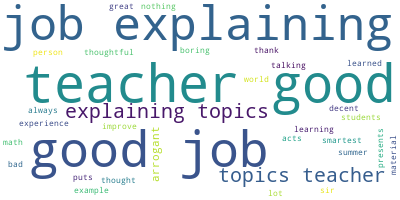

In [9]:
#word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
long_string = ','.join(list(df2['cleaned_texts'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

TEST PART

In [45]:
# Load in the dataframe
df = pd.read_csv("test_v2.csv")
df

cleaned_texts classification  subject  \
0                                      boring teacher       Negative     math   
1                              good teacher thank sir       Positive     math   
2    learning math teacher summer great experience...       Positive     math   
3                                     learned nothing        Neutral     math   
4                 teacher always arrogant bad example       Negative     math   
5                              teacher decent improve       Negative     math   
6    teacher acts like smartest person world arrog...       Positive  science   
7                  teacher good job explaining topics       Positive  science   
8                  teacher good job explaining topics       Positive  science   
9                  teacher good job explaining topics       Positive  science   
10                 teacher good job explaining topics       Positive  science   
11                 teacher good job explaining topics       Positive  science   
12                 teacher good job explaining topics       Positive  science   
13                 teacher good job explaining topics       Positive  science   
14                 teacher good job explaining topics       Positive  science   
15                 teacher good job explaining topics       Positive  science   
16                 teacher good job explaining topics       Positive  science   
17                 teacher good job explaining topics       Positive  science   
18                 teacher good job explaining topics       Positive  english   
19                 teacher good job explaining topics       Positive  english   
20                 teacher good job explaining topics       Positive  english   
21                 teacher good job explaining topics       Positive  english   
22                 teacher good job explaining topics       Positive  english   
23                 teacher good job explaining topics       Positive  english   
24                 teacher good job explaining topics       Positive  english   
25                 teacher good job explaining topics       Positive  english   
26                 teacher good job explaining topics       Positive  history   
27                 teacher good job explaining topics       Positive  history   
28                 teacher good job explaining topics       Positive  history   
29                 teacher good job explaining topics       Positive  history   
30                 teacher good job explaining topics       Positive  history   
31                 teacher good job explaining topics       Positive  history   

         prof compound_classification  
0   teacher 1                 Neutral  
1   teacher 1                Positive  
2   teacher 1                Positive  
3   teacher 1                 Neutral  
4   teacher 1                Negative  
5   teacher 1                Positive  
6   teacher 1                Positive  
7   teacher 1                Positive  
8   teacher 2                Positive  
9   teacher 2                Positive  
10  teacher 2                Positive  
11  teacher 2                Positive  
12  teacher 2                Positive  
13  teacher 3                Positive  
14  teacher 3                Positive  
15  teacher 3                Positive  
16  teacher 3                Positive  
17  teacher 3                Positive  
18  teacher 3                Positive  
19  teacher 3                Positive  
20  teacher 3                Positive  
21  teacher 3                Positive  
22  teacher 3                Positive  
23  teacher 3                Positive  
24  teacher 3                Positive  
25  teacher 3                Positive  
26  teacher 3                Positive  
27  teacher 3                Positive  
28  teacher 3                Positive  
29  teacher 3                Positive  
30  teacher 3                Positive  
31  teacher 3                Positive

In [46]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 32 observations and 5 features in this dataset. 



In [47]:
#Test Groupby by Profs
prof = df.groupby("prof")

# Summary statistic of all Profs
prof.describe().head()

cleaned_texts                                                   \
                  count unique                                  top freq   
prof                                                                       
teacher 1             8      8                      learned nothing    1   
teacher 2             5      1   teacher good job explaining topics    5   
teacher 3            19      1   teacher good job explaining topics   19   

          classification                       subject                       \
                   count unique       top freq   count unique      top freq   
prof                                                                          
teacher 1              8      3  Positive    4       8      2     math    6   
teacher 2              5      1  Positive    5       5      1  science    5   
teacher 3             19      1  Positive   19      19      3  english    8   

          compound_classification                        
                            count unique       top freq  
prof                                                     
teacher 1                       8      3  Positive    5  
teacher 2                       5      1  Positive    5  
teacher 3                      19      1  Positive   19

Filtering 1 prof from the dataset using wordcloud to Process

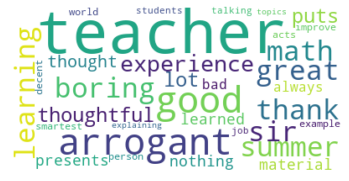

In [48]:
#filter the df to one Prof, and create a list of responses from them
text = df[df.prof=='teacher 1'].cleaned_texts.tolist()

# join the list and lowercase all the words
text = ' '.join(text).lower()

#create the wordcloud object
wordcloud = WordCloud(background_color="white", stopwords = STOPWORDS,
                      collocations=True).generate(text)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

Filtering 1 prof from the dataset Try Utilizing Word Frequencies

In [49]:
# create a list of Profs
profs = df.prof.unique()
#create a list of responses for each prof using a list comprehension
corpus = [' '.join(df[(df.prof==teacher)].cleaned_texts.tolist()) for teacher in profs]

# import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#instantiate a CountVectorizer object
cv=CountVectorizer( stop_words=stop_words_en, ngram_range=(1, 3))

# fit transform our text and create a dataframe with the result
X = cv.fit_transform(corpus)
X = X.toarray()

bow=pd.DataFrame(X, columns = cv.get_feature_names())
bow.index=profs
bow

acts  acts like  acts like smartest  always  always arrogant  \
teacher 1     1          1                   1       1                1   
teacher 2     0          0                   0       0                0   
teacher 3     0          0                   0       0                0   

           always arrogant bad  arrogant  arrogant bad  arrogant bad example  \
teacher 1                    1         2             1                     1   
teacher 2                    0         0             0                     0   
teacher 3                    0         0             0                     0   

           arrogant talking  ...  thought presents material  thoughtful  \
teacher 1                 1  ...                          1           1   
teacher 2                 0  ...                          0           0   
teacher 3                 0  ...                          0           0   

           thoughtful teacher  thoughtful teacher puts  topics  \
teacher 1                   1                        1       1   
teacher 2                   0                        0       5   
teacher 3                   0                        0      19   

           topics teacher  topics teacher good  world  world arrogant  \
teacher 1               0                    0      1               1   
teacher 2               4                    4      0               0   
teacher 3              18                   18      0               0   

           world arrogant talking  
teacher 1                       1  
teacher 2                       0  
teacher 3                       0  

[3 rows x 119 columns]

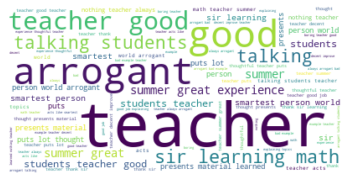

In [50]:
# create a pandas Series of the frequent words
text=bow.loc['teacher 1'].sort_values(ascending=False)[:100]

# create a dictionary Note
text2_dict=bow.loc['teacher 1'].sort_values(ascending=False).to_dict()

# create the WordCloud object
wordcloud = WordCloud(min_word_length =3,
                      background_color='white')

# generate the word cloud
wordcloud.generate_from_frequencies(text2_dict)

#plot
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Try using Sentiment

In [51]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [52]:
# import the relevant modules from the NLTK library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
 
def classify_compound(text, threshold=0.33):
     
    # initialize VADER
    sid = SentimentIntensityAnalyzer()
     
    # Calling the polarity_scores method on sid and passing in the text
    # outputs a dictionary with negative, neutral, positive, and compound scores for the input text
    scores = sid.polarity_scores(text)
     
    # get compound score
    score = scores['compound']
     
    # translate the score into the correcponding input according to the threshold
    if score <= -threshold: return 'Negative'
    elif score >= threshold: return 'Positive'
    else: return 'Neutral'

In [53]:
# create a new feature based on compound score from VADER using our function "classify_compound"
df['compound_classification'] = df.cleaned_texts.apply(lambda text: classify_compound(text))
df

df.to_csv(r'C:/Users/Admin/Desktop/School/4th year 1st sem/Finals/9445-kairos-finals/test_v2.csv', index = False)

cleaned_texts classification  subject  \
0                                      boring teacher       Negative     math   
1                              good teacher thank sir       Positive     math   
2    learning math teacher summer great experience...       Positive     math   
3                                     learned nothing        Neutral     math   
4                 teacher always arrogant bad example       Negative     math   
5                              teacher decent improve       Negative     math   
6    teacher acts like smartest person world arrog...       Positive  science   
7                  teacher good job explaining topics       Positive  science   
8                  teacher good job explaining topics       Positive  science   
9                  teacher good job explaining topics       Positive  science   
10                 teacher good job explaining topics       Positive  science   
11                 teacher good job explaining topics       Positive  science   
12                 teacher good job explaining topics       Positive  science   
13                 teacher good job explaining topics       Positive  science   
14                 teacher good job explaining topics       Positive  science   
15                 teacher good job explaining topics       Positive  science   
16                 teacher good job explaining topics       Positive  science   
17                 teacher good job explaining topics       Positive  science   
18                 teacher good job explaining topics       Positive  english   
19                 teacher good job explaining topics       Positive  english   
20                 teacher good job explaining topics       Positive  english   
21                 teacher good job explaining topics       Positive  english   
22                 teacher good job explaining topics       Positive  english   
23                 teacher good job explaining topics       Positive  english   
24                 teacher good job explaining topics       Positive  english   
25                 teacher good job explaining topics       Positive  english   
26                 teacher good job explaining topics       Positive  history   
27                 teacher good job explaining topics       Positive  history   
28                 teacher good job explaining topics       Positive  history   
29                 teacher good job explaining topics       Positive  history   
30                 teacher good job explaining topics       Positive  history   
31                 teacher good job explaining topics       Positive  history   

         prof compound_classification  
0   teacher 1                 Neutral  
1   teacher 1                Positive  
2   teacher 1                Positive  
3   teacher 1                 Neutral  
4   teacher 1                Negative  
5   teacher 1                Positive  
6   teacher 1                Positive  
7   teacher 1                Positive  
8   teacher 2                Positive  
9   teacher 2                Positive  
10  teacher 2                Positive  
11  teacher 2                Positive  
12  teacher 2                Positive  
13  teacher 3                Positive  
14  teacher 3                Positive  
15  teacher 3                Positive  
16  teacher 3                Positive  
17  teacher 3                Positive  
18  teacher 3                Positive  
19  teacher 3                Positive  
20  teacher 3                Positive  
21  teacher 3                Positive  
22  teacher 3                Positive  
23  teacher 3                Positive  
24  teacher 3                Positive  
25  teacher 3                Positive  
26  teacher 3                Positive  
27  teacher 3                Positive  
28  teacher 3                Positive  
29  teacher 3                Positive  
30  teacher 3                Positive  
31  teacher 3                Positive

In [38]:
pd.concat([df.classification.value_counts(),df.compound_classification.value_counts()], axis=1, sort='True')

classification  compound_classification
Negative               3                        1
Neutral                1                        2
Positive              28                       29

In [39]:
mask_differents = df.classification != df.compound_classification
differences = df[mask_differents]
print('There are {:.2%} different values between classification and compound_classification'.format(differences.shape[0] / df.shape[0]))
print('Showing 2 random rows with different original classification and compound_classification:')
differences.sample(2)

There are 6.25% different values between classification and compound_classification
Showing 2 random rows with different original classification and compound_classification:


cleaned_texts classification subject       prof  \
5   teacher decent improve       Negative    math  teacher 1   
0           boring teacher       Negative    math  teacher 1   

  compound_classification  
5                Positive  
0                 Neutral

<ipython-input-40-7b84538a6689>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  original_text = " ".join(review for review in df[~mask_differents][df.compound_classification == sentiment].cleaned_texts)
<ipython-input-40-7b84538a6689>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  compound_text = " ".join(review for review in df[~mask_differents][df.compound_classification == sentiment].cleaned_texts)


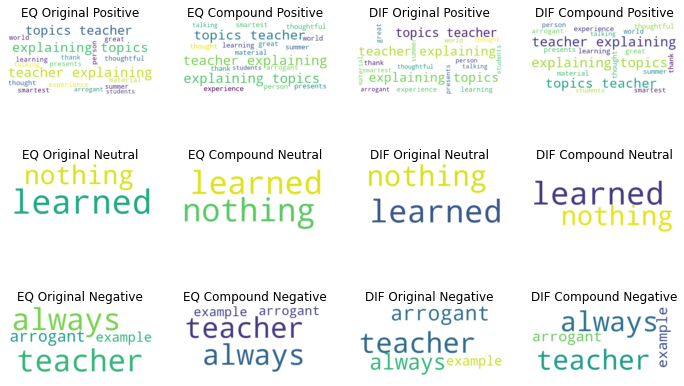

In [40]:
fig = plt.figure(num=12, figsize=(12, 10))
for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    if i == 1: i = 4
    elif i == 2: i = 8
     
    # join all response
    original_text = " ".join(review for review in df[~mask_differents][df.compound_classification == sentiment].cleaned_texts)
    compound_text = " ".join(review for review in df[~mask_differents][df.compound_classification == sentiment].cleaned_texts)
    original_text_dif = " ".join(review for review in differences[differences.compound_classification == sentiment].cleaned_texts)
    compound_text_dif = " ".join(review for review in differences[differences.compound_classification == sentiment].cleaned_texts)
     
    original_wc = WordCloud(stopwords=stopwords, background_color="white", max_words=50, min_word_length=5).generate(original_text)
    compound_wc = WordCloud(stopwords=stopwords, background_color="white", max_words=50, min_word_length=5).generate(compound_text)
    original_wc_dif = WordCloud(stopwords=stopwords, background_color="white", max_words=50, min_word_length=5).generate(original_text)
    compound_wc_dif = WordCloud(stopwords=stopwords, background_color="white", max_words=50, min_word_length=5).generate(compound_text)
     
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(original_wc, interpolation='bilinear', alpha=1)
    plt.axis("off")
    plt.title('EQ Original ' + sentiment)
     
    fig.add_subplot(4, 4, i + 2)
    plt.imshow(compound_wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('EQ Compound ' + sentiment)
 
    fig.add_subplot(4, 4, i + 3)
    plt.imshow(original_wc_dif, interpolation='bilinear')
    plt.axis("off")
    plt.title('DIF Original ' + sentiment)
     
    fig.add_subplot(4, 4, i + 4)
    plt.imshow(compound_wc_dif, interpolation='bilinear')
    plt.axis("off")
    plt.title('DIF Compound ' + sentiment)
     
plt.show()

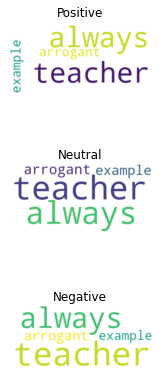

In [41]:
fig = plt.figure(num=12, figsize=(12, 10))
for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    if i == 1: i = 4
    elif i == 2: i = 8
     
    # response for Prof 1
    compound_text_dif = " ".join(review for review in differences[differences.compound_classification == sentiment].cleaned_texts)
    compound_wc_dif = WordCloud(stopwords=stopwords, background_color="white", max_words=50, min_word_length=5).generate(compound_text)
     
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(compound_wc_dif, interpolation='bilinear')
    plt.axis("off")
    plt.title(sentiment)
     
plt.show()